In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Advection Analysis

In [2]:
def plot_relative_perm(input_data):
    """
    Function to read a csv file and plot the relative permeability curves

    Args:
    input_data: str
        The name of the csv file containing the relative permeability data

    Returns:
    None
    """
    # Read the csv file
    data = pd.read_csv(input_data)

    # Extract the data
    # There are three cases to consider. 
    # Each row is a different set of data

    # Case 1: CO2 displacing water, primary drainage
    # Extract the data from the first row
    co2_water = data.iloc[0, :]

    #Case 2: Water displacing H2, secondary imbibition
    # Extract the data from the second row
    water_h2 = data.iloc[1, :]

    #Case 3: water displacing CO2 in a depleted field
    # Extract the data from the third row
    water_co2 = data.iloc[2, :]

    #get the effective saturation for each case
    
    # Case 1
    s1_low_case1 = co2_water['S1i']
    s1_max_case1 = 1 - co2_water['S2r']
    s1_case1 = np.linspace(s1_low_case1, s1_max_case1, 100)

    s1_eff_1 = (s1_case1 - s1_low_case1)/(1 - co2_water['S1i'] - co2_water['S2r'])

    k_r1_case1 = co2_water['kmax_Kr1'] * (s1_eff_1)**co2_water['a']
    k_r2_case1 = co2_water['kmax_Kr2'] * (1 - s1_eff_1)**co2_water['b']


    # Case 2
    s1_low_case2 = water_h2['S1i']
    s1_max_case2 = 1 - water_h2['S2r']
    s1_case2 = np.linspace(s1_low_case2, s1_max_case2, 100)
    
    s_eff_2 = (s1_case2 - water_h2['S1i'])/(1 - water_h2['S1i'] - water_h2['S2r'])

    k_r1_case2 = water_h2['kmax_Kr1'] * (s_eff_2)**water_h2['a']
    k_r2_case2 = water_h2['kmax_Kr2'] * (1 - s_eff_2)**water_h2['b']

    
    # Case 3
    s1_low_case3 = water_co2['S1i']
    s1_max_case3 = 1 - water_co2['S2r']
    s1_case3 = np.linspace(s1_low_case3, s1_max_case3, 100)
    
    s_eff_3 = (s1_case3 - water_co2['S1i'])/(1 - water_co2['S1i'] - water_co2['S2r'])

    k_r1_case3 = water_co2['kmax_Kr1'] * (s_eff_3)**water_co2['a']
    k_r2_case3 = water_co2['kmax_Kr2'] * (1 - s_eff_3)**water_co2['b']

    # Plot the 3 set of curves in a format of 1x3 subplots

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Case 1
    ax[0].plot((s1_case1), k_r1_case1, label=r'CO$_{2}$')
    ax[0].plot((s1_case1), k_r2_case1, label=r'Water')
    ax[0].set_xlabel(r'$S_{1} (CO_{2})$', fontsize=12)
    ax[0].set_ylabel(r'$k_{r}$', fontsize=12)
    ax[0].set_title(r'$CO_{2}$ displacing water - Case 1')
    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, 1)
    ax[0].legend()

    # Case 2
    ax[1].plot(s1_case2, k_r1_case2, label='Water')
    ax[1].plot(s1_case2, k_r2_case2, label=r'H$_{2}$')
    ax[1].set_xlabel(r'$S_{1} - Water$', fontsize=12)
    ax[1].set_ylabel(r'$k_{r}$', fontsize=12)
    ax[1].set_title(r'Water displacing $H_{2}$ -  Case 2')
    ax[1].set_xlim(0, 1)
    ax[1].set_ylim(0, 1)
    ax[1].legend()

    # Case 3
    ax[2].plot(s1_case3, k_r1_case3, label='Water')
    ax[2].plot(s1_case3, k_r2_case3, label=r'CO$_{2}$')
    ax[2].set_xlabel(r'$S_{1} - Water$', fontsize=12)
    ax[2].set_ylabel(r'$k_{r}$', fontsize=12)
    ax[2].set_title(r'Water displacing $CO_{2}$ -  Case 3')
    ax[2].set_xlim(0, 1)
    ax[2].set_ylim(0, 1)
    ax[2].legend()

    plt.show()

   #create a dictionary to store the relative permeabilities for each case
   # The keys are the names of the cases and the values are the relative permeabilities
    
    relative_perm = {'Case_1': {'s1': s1_case1, 'kr1': k_r1_case1, 'kr2': k_r2_case1},
                        'Case_2': {'s1': s1_case2, 'kr1': k_r1_case2, 'kr2': k_r2_case2},
                        'Case_3': {'s1': s1_case3, 'kr1': k_r1_case3, 'kr2': k_r2_case3}}
    
    return relative_perm



In [3]:
data ='/home/ejt123/2024/CodingFluidFlow/data_cases.csv'

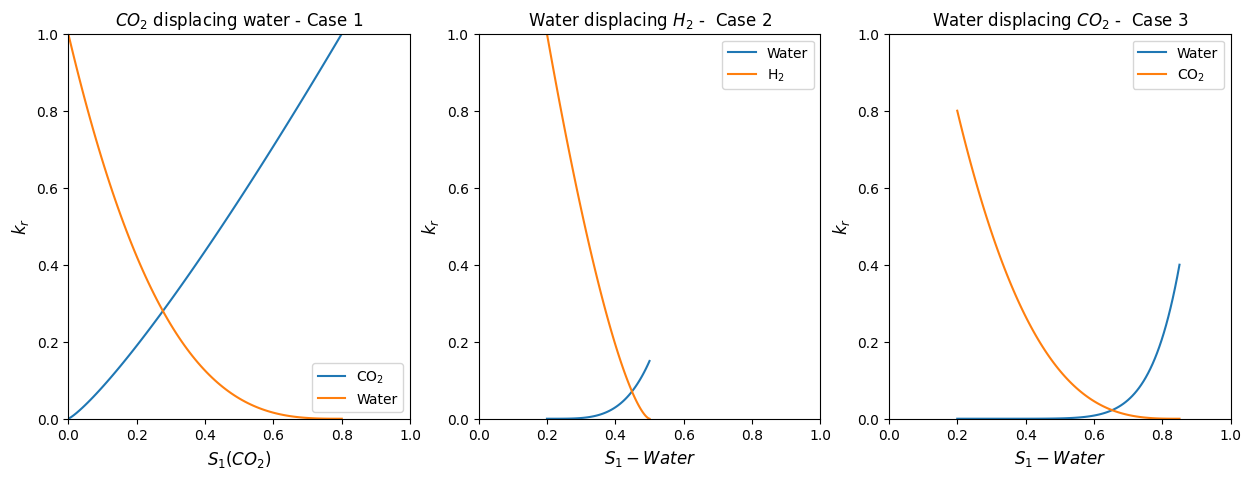

In [4]:
permeabilities = plot_relative_perm(data)

In [5]:
permeabilities.keys()

len(permeabilities['Case_3']['s1'])

100

In [6]:
def fractional_flow(dict_perm, data):

    """
    
    Function to calculate and plot 
    the fractional flow for each case

    The dictionary contains the relative permeability data for each case
    The keys are the names of the cases and the values are the relative permeabilities

    Args:
    dict_perm: dict
        A dictionary containing the relative permeability data for each case

    data: dataframe
        The dataframe containing the values for viscosity
    
    Returns:
    None
    """
    data = pd.read_csv(data)
    
    case_1 = dict_perm['Case_1']
    case_2 = dict_perm['Case_2']
    case_3 = dict_perm['Case_3']

    #Case 1:
    co2_water = data.iloc[0, :]
    vis_1_phase_1 = co2_water['mu1_mPa.s']*10**-3
    vis_1_phase_2 = co2_water['mu2_mPa.s']*10**-3

    #Case 2:
    water_h2 = data.iloc[1, :]
    vis_water_2 = water_h2['mu1_mPa.s']*10**-3
    vis_h2_2 = water_h2['mu2_mPa.s']*10**-3

    #Case 3
    water_co2 = data.iloc[2, :]
    vis_water_3 = water_co2['mu1_mPa.s']*10**-3
    vis_co2_3 = water_co2['mu2_mPa.s']*10**-3
    

    # Calculate the fractional flow for each case

    #Case 1
    f_case1 = 1 / (1 + (vis_1_phase_1 / vis_1_phase_2) * (case_1['kr2'] / case_1['kr1']))
    saturation_case1 = case_1['s1']

    #Case 2
    f_case2 = 1 / (1 + (vis_water_2 / vis_h2_2) * (case_2['kr2'] / case_2['kr1']))
    saturation_case2 = case_2['s1']

    #Case 3
    f_case3 = 1 / (1 + (vis_water_3 / vis_co2_3) * (case_3['kr2'] / case_3['kr1']))
    saturation_case3 = case_3['s1']

    # Plot the fractional flow for each case

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Case 1
    ax[0].plot(saturation_case1, f_case1)
    ax[0].set_xlabel(r'$S_{1} - CO_{2}$', fontsize=12)
    ax[0].set_ylabel(r'$f_{1}$', fontsize=12)
    ax[0].set_title(r'$CO_{2}$ displacing water - Case 1')
    #ax[0].set_xlim(-0.05, 1.05)
    ax[0].set_ylim(-0.05, 1.05)

    # Case 2
    ax[1].plot(saturation_case2, f_case2)
    ax[1].set_xlabel(r'$S_{1} - Water$', fontsize=12)
    ax[1].set_ylabel(r'$f_{1}$', fontsize=12)
    ax[1].set_title(r'Water displacing $H_{2}$ -  Case 2')
    #ax[1].set_xlim(-0.05, 1.05)
    ax[1].set_ylim(-0.05, 1.05)

    # Case 3
    ax[2].plot(saturation_case3, f_case3)
    ax[2].set_xlabel(r'$S_{1} - Water$', fontsize=12)
    ax[2].set_ylabel(r'$f_{1}$', fontsize=12)
    ax[2].set_title('Water displacing $CO_{2}$ -  Case 3')
    #ax[2].set_xlim(-0.05, 1.05)
    ax[2].set_ylim(-0.05, 1.05)

    #Dictionary to store the fractional flow for each case and the saturation
    
    fractional_flow = {'Case_1': {'s1': saturation_case1, 'f': f_case1},
                        'Case_2': {'s1': saturation_case2, 'f': f_case2},
                        'Case_3': {'s1': saturation_case3, 'f': f_case3}}


    return fractional_flow

/tmp/ipykernel_932/3742556191.py:46: RuntimeWarning: divide by zero encountered in divide
  f_case1 = 1 / (1 + (vis_1_phase_1 / vis_1_phase_2) * (case_1['kr2'] / case_1['kr1']))
/tmp/ipykernel_932/3742556191.py:50: RuntimeWarning: divide by zero encountered in divide
  f_case2 = 1 / (1 + (vis_water_2 / vis_h2_2) * (case_2['kr2'] / case_2['kr1']))
/tmp/ipykernel_932/3742556191.py:54: RuntimeWarning: divide by zero encountered in divide
  f_case3 = 1 / (1 + (vis_water_3 / vis_co2_3) * (case_3['kr2'] / case_3['kr1']))


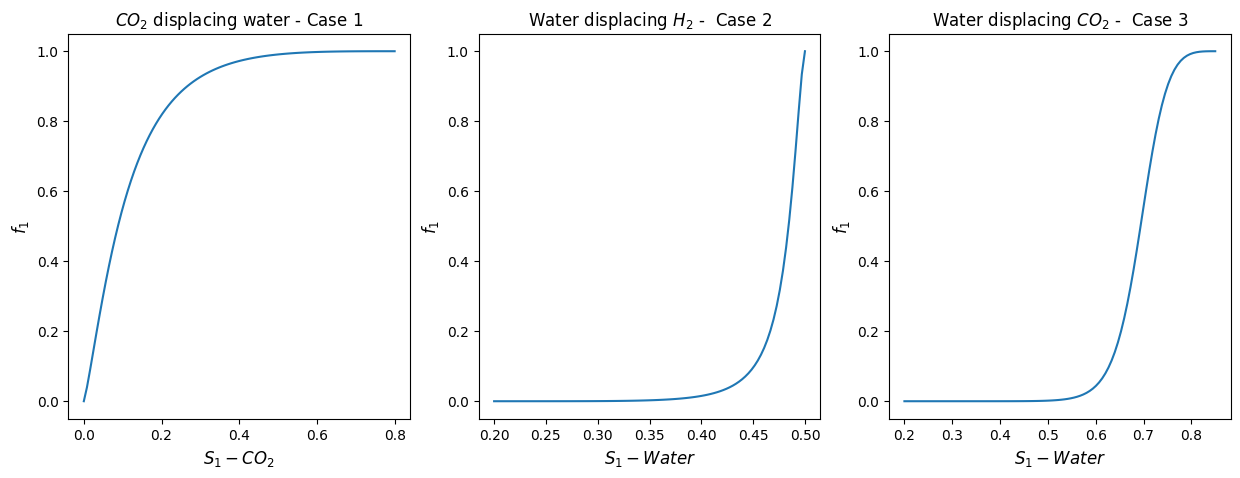

In [7]:
data ='/home/ejt123/2024/CodingFluidFlow/data_cases.csv'
perm = permeabilities
fractional_flow = fractional_flow(perm, data)

In [8]:
len(fractional_flow['Case_3']['s1'])

100

In [21]:
def get_vd_saturation(dict_data, df):

    """
    Function to calculate the velocity of the displacement front
    and the saturation at which it occurs
    
    Args:
    data: dictionary
        A dictionary containing the fractional flow data for each case
        The keys are the names of the cases and the values are the fractional flow and saturation

    Returns:
    vd_saturation: dictionary
        A dictionary containing the velocity of the displacement front and the saturation at which it occurs for each case
    """

    df = pd.read_csv(df)
    #Case 1
    case_1 = dict_data['Case_1']
    s1_case1 = case_1['s1']
    f_case1 = case_1['f']

    #Case 2
    case_2 = dict_data['Case_2']
    s1_case2 = case_2['s1']
    f_case2 = case_2['f']

    #Case 3
    case_3 = dict_data['Case_3']
    s1_case3 = case_3['s1']
    f_case3 = case_3['f']

    #Calculate the velocity of the displacement front and the saturation at which it occurs for each case

    #Case 1
    vd_case1 = np.diff(f_case1) / np.diff(s1_case1)
    s_vd_case1 = s1_case1[:-1]

    #Saturation at which the shock front occurs
    vd_shock_1 = s_vd_case1[np.argmax(vd_case1)]

    #Max value of vd_case1
    max_vd_case1 = np.max(vd_case1)

    #for saturation less or equal than the saturation at which the shock front occurs return the max value of vd_case1
    vd_case1[s_vd_case1 <= vd_shock_1] = max_vd_case1
    

    #Case 2 
    s2r_2 = df.iloc[1, :]['S2r']
    s1i_2 = df.iloc[1, :]['S1i']

    vd_case2 = np.empty_like(s1_case2)
    vd_shock_2 = 1 / (1 - s2r_2 - s1i_2)

    #fill vd_case like this:
    #between 0 and vd_shock_2, vd_case2 = vd_shock_2
    #for values greater than vd_shock_2, vd_case2 = s1i 

    vd_case2[s1_case2 <= vd_shock_2] = vd_shock_2
    vd_case2[s1_case2 > vd_shock_2] = s1i_2

    # vd_case2 = np.diff(f_case2) / np.diff(s1_case2)
    # s_vd_case2 = s1_case2[:-1]
    # vd_shock_2 = s_vd_case2[np.argmax(vd_case2)]
    
    #Case 3

    s2r_3 = df.iloc[2, :]['S2r']
    s1i_3 = df.iloc[2, :]['S1i']

    vd_case3 = np.diff(f_case3) / np.diff(s1_case3)
    s_vd_case3 = s1_case3[:-1]


    #Get saturation at max vd_case3
    sat_shock = s_vd_case3[np.argmax(vd_case3)]

    vd_case3[s_vd_case3 <= sat_shock] = np.max(vd_case3)

    #add 5 elements at the beginning of the s_vd_case3 array with values 0.2
    s_vd_case3 = np.concatenate((np.repeat(0.2, 5), s_vd_case3))

    #add 5 elements at the beginning of the vd_case3 array with values equal to the first element of vd_case3 plus 0.1 
    vd_case3 = np.concatenate((np.repeat(vd_case3[0] + 15, 5), vd_case3))

    vd_saturation = {'Case_1': {'s': s_vd_case1, 'vd': vd_case1},
                     'Case_2': {'s': s1_case2, 'vd': vd_case2},
                     'Case_3': {'s': s_vd_case3, 'vd': vd_case3}} 
    
    shocks = {'Case_1': {'s': vd_shock_1,},
              'Case_2': {'s': vd_shock_2,},
              }
    
    return vd_saturation, shocks


In [22]:
vd = get_vd_saturation(fractional_flow, df='/home/ejt123/2024/CodingFluidFlow/data_cases.csv')[0]
vd_shocks = get_vd_saturation(fractional_flow, df='/home/ejt123/2024/CodingFluidFlow/data_cases.csv')[1]

In [23]:
vd['Case_3']['vd']

array([2.38761271e+01, 2.38761271e+01, 2.38761271e+01, 2.38761271e+01,
       2.38761271e+01, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
       8.87612706e+00, 8.87612706e+00, 8.87612706e+00, 8.87612706e+00,
      

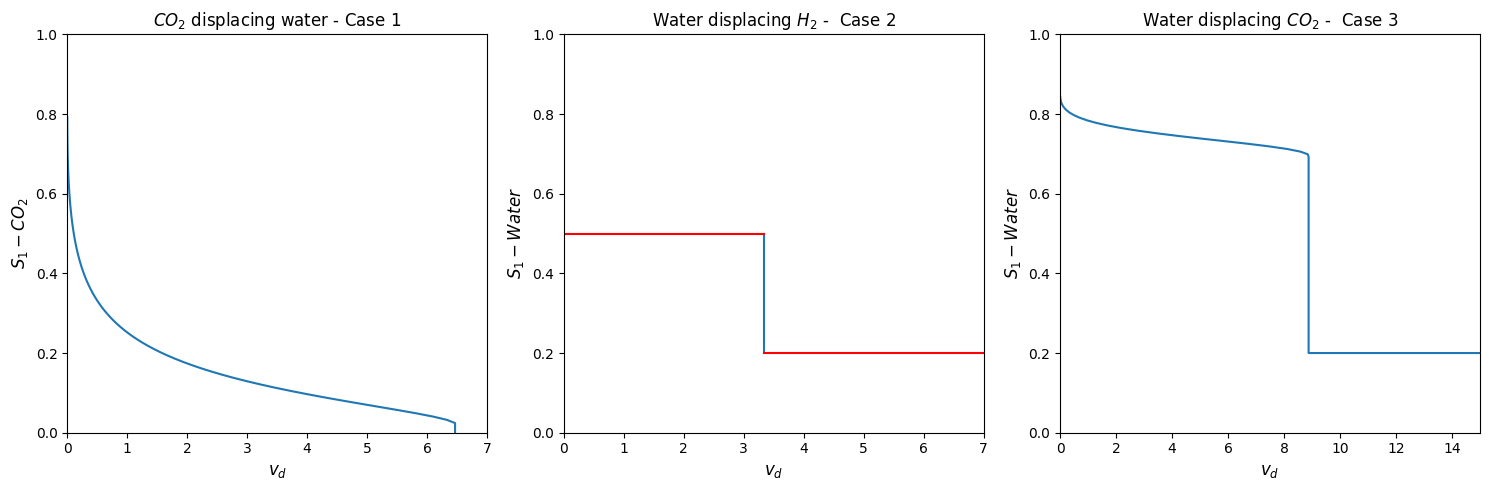

In [24]:
#plot the velocity of the displacement front and the saturation at which it occurs for each case

vd_shocks_1 = vd_shocks['Case_1']['s']
vd_shocks_2 = vd_shocks['Case_2']['s']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Case 1
ax[0].plot(vd['Case_1']['vd'], vd['Case_1']['s'])

ax[0].set_ylabel(r'$S_{1} - CO_{2}$', fontsize=12)
ax[0].set_xlabel(r'$v_{d}$', fontsize=12)
ax[0].set_title(r'$CO_{2}$ displacing water - Case 1')
ax[0].set_xlim(0.0, 7)
ax[0].set_ylim(0.0, 1)

#Case 2
ax[1].plot(vd['Case_2']['vd'], vd['Case_2']['s'])
ax[1].set_ylabel(r'$S_{1} - Water$', fontsize=12)
ax[1].set_xlabel(r'$v_{d}$', fontsize=12)
ax[1].set_title(r'Water displacing $H_{2}$ -  Case 2')

#draw horizontal line between 1-s2r and vd_shock_2 

dataframe_input = pd.read_csv('/home/ejt123/2024/CodingFluidFlow/data_cases.csv') 
s2r_2 = dataframe_input.iloc[1, :]['S2r']
s1i_2 = dataframe_input.iloc[1, :]['S1i']

#Plot a line between 1-s2r and vd_shock_2 using ax[1].plot() method
ax[1].plot([0, vd_shocks_2], [ 1 - s2r_2, 1 - s2r_2], 'r-', label='1 - S2r')
ax[1].plot([vd_shocks_2,7], [s1i_2, s1i_2] ,'r-', label='1 - S2r')

ax[1].set_xlim(0.0, 7)
ax[1].set_ylim(0.0, 1)



#Case 3
ax[2].plot(vd['Case_3']['vd'], vd['Case_3']['s'])
ax[2].set_ylabel(r'$S_{1} - Water$', fontsize=12)
ax[2].set_xlabel(r'$v_{d}$', fontsize=12)
ax[2].set_title(r'Water displacing $CO_{2}$ -  Case 3')
ax[2].set_xlim(0.0, 15)
ax[2].set_ylim(0.0, 1)

#Ensure spacing between the subplots
plt.tight_layout()




## Imbibition Analysis

In [157]:
def capillary_pressure(df_imbibition):

    """
    Function to calculate and plot the capillary pressure and
    saturation for the imbibition process

    Args:
    df_imbibition: dataframe
        The dataframe containing the imbibition data

    Returns:
    dict_pc_sw: dictionary
        A dictionary containing the capillary pressure and saturation for each case
    """

    df_imbibition = pd.read_csv(df_imbibition)

    #Case 2
    water_h2 = df_imbibition.iloc[1, :]

    #Case 3
    water_co2 = df_imbibition.iloc[2, :]

    #Saturations

    s1_case2 =  np.linspace(water_h2['S1i'], 1 - water_h2['S2r'], 100)
    s1_case3 = np.linspace(water_co2['S1i'], 1 - water_co2['S2r'], 100) 

    #coefficients
    c_case2 = water_h2['c']
    c_case3 = water_co2['c']

    pc_max_case2 = water_h2['Pc_max_kPa']*10**3
    pc_max_case3 = water_co2['Pc_max_kPa']*10**3

    s_star_case2 = water_h2['S*1']
    s_star_case3 = water_co2['S*1']

    #Calculate the capillary pressure for each case
    pc_case2 = pc_max_case2 * ( (((s_star_case2/water_h2['S1i'])**(-c_case2)) - ((s1_case2/water_h2['S1i'])**(-c_case2)) )  /   ((s_star_case2/water_h2['S1i'])**(-c_case2) - 1))

    pc_case3 = pc_max_case3 * ( ((s_star_case3/water_co2['S1i'])**(-c_case3) - (s1_case3/water_co2['S1i'])**(-c_case3) )  /   ((s_star_case3/water_co2['S1i'])**(-c_case3) - 1))


    #For both cases, delete elements with negative capillary pressure
    pc_case2 = pc_case2[pc_case2 >= 0]
    s1_case2 = s1_case2[:len(pc_case2)]

    pc_case3 = pc_case3[pc_case3 >= 0]
    s1_case3 = s1_case3[:len(pc_case3)]
    
    #Plot the capillary pressure for each case

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    #Case 2
    ax[0].plot(s1_case2, pc_case2)
    ax[0].set_xlabel(r'$S_{1} - Water$', fontsize=12)
    ax[0].set_ylabel(r'$P_{c}$  $[Pa]$', fontsize=12)
    ax[0].set_title(r'Water displacing $H_{2}$ -  Case 2')
    ax[0].set_xlim(0.2, 0.5)
    ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #ax[0].set_ylim(0, 10000)

    #Case 3
    ax[1].plot(s1_case3, pc_case3)
    ax[1].set_xlabel(r'$S_{1} - Water$', fontsize=12)
    ax[1].set_ylabel(r'$P_{c}$  $[Pa]$', fontsize=12)
    ax[1].set_title(r'Water displacing $CO_{2}$ -  Case 3')
    ax[1].set_xlim(0.2, 0.5)
    ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    #ax[1].set_ylim(0, 10000)

    dict_pc_sw = {'Case_2': {'s': s1_case2, 'pc': pc_case2},
                    'Case_3': {'s': s1_case3, 'pc': pc_case3}}
    
    return dict_pc_sw



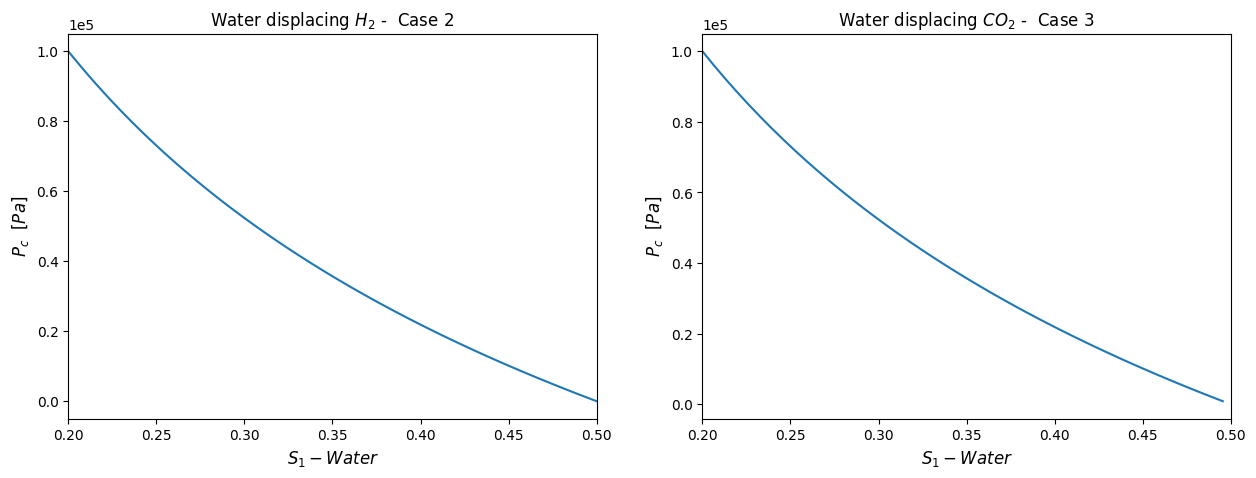

In [158]:
capillary_pressure = capillary_pressure(df_imbibition='/home/ejt123/2024/CodingFluidFlow/data_cases.csv')

## Diffusion coefficient

In [159]:
def get_diffusion_coeff(dict_pc_sw, dict_rel_perm, df_diffusion):

    """
    Function to calculate the diffusion coefficient for each case

    Args:
    dict_pc_sw: dictionary
        A dictionary containing the capillary pressure and saturation for each case

    dict_rel_perm: dictionary
        A dictionary containing the relative permeability data for each case

    df_diffusion: dataframe
        The dataframe containing the diffusion data

    Returns:
    dict_diffusion: dictionary
        A dictionary containing the diffusion coefficient for each case
    """

    df_diffusion = pd.read_csv(df_diffusion)

    #defining constants
    K_m2_case2 = df_diffusion.iloc[1, :]['K_m2']
    K_m2_case3 = df_diffusion.iloc[2, :]['K_m2']

    vis_water_case2 = df_diffusion.iloc[1, :]['mu1_mPa.s']*10**-3
    vis_h2_case2 = df_diffusion.iloc[1, :]['mu2_mPa.s']*10**-3

    vis_water_case3 = df_diffusion.iloc[2, :]['mu1_mPa.s']*10**-3
    vis_co2_case3 = df_diffusion.iloc[2, :]['mu2_mPa.s']*10**-3

    #get the relative permeabilities only for the saturation values for which we have capillary pressure for both cases

    dict_rel_perm['Case_2']['s1'] = dict_rel_perm['Case_2']['s1'][:len(dict_pc_sw['Case_2']['s'])]
    dict_rel_perm['Case_2']['kr1'] = dict_rel_perm['Case_2']['kr1'][:len(dict_pc_sw['Case_2']['s'])]
    dict_rel_perm['Case_2']['kr2'] = dict_rel_perm['Case_2']['kr2'][:len(dict_pc_sw['Case_2']['s'])]

    dict_rel_perm['Case_3']['s1'] = dict_rel_perm['Case_3']['s1'][:len(dict_pc_sw['Case_3']['s'])]
    dict_rel_perm['Case_3']['kr1'] = dict_rel_perm['Case_3']['kr1'][:len(dict_pc_sw['Case_3']['s'])]
    dict_rel_perm['Case_3']['kr2'] = dict_rel_perm['Case_3']['kr2'][:len(dict_pc_sw['Case_3']['s'])]

    #get the relative permeabilities for each case

    kr1_case2 = dict_rel_perm['Case_2']['kr1']
    kr2_case2 = dict_rel_perm['Case_2']['kr2']

    kr1_case3 = dict_rel_perm['Case_3']['kr1']
    kr2_case3 = dict_rel_perm['Case_3']['kr2']

    #Capillary pressure for each case

    pc_case2 = dict_pc_sw['Case_2']['pc']
    pc_case3 = dict_pc_sw['Case_3']['pc']

    #saturations
    s1_case2 = dict_pc_sw['Case_2']['s']
    s1_case3 = dict_pc_sw['Case_3']['s']

    #Calculate the diffusion coefficient for Case 2

    constant_case2 = ( (kr1_case2*kr2_case2/(vis_water_case2*vis_h2_case2)) / ((kr1_case2/vis_water_case2) + (kr2_case2/vis_h2_case2)) ) * K_m2_case2*(-1)

    D_coeff_case2 = constant_case2[:-1]*np.diff(pc_case2)/np.diff(s1_case2)

    s1_case2 = s1_case2[:-1]

    #Calculate the diffusion coefficient for Case 2

    constant_case3 = ( (kr1_case3*kr2_case3/(vis_water_case3*vis_co2_case3)) / ((kr1_case3/vis_water_case3) + (kr2_case3/vis_co2_case3)) ) * K_m2_case3*(-1)

    D_coeff_case3 = constant_case3[:-1]*np.diff(pc_case3)/np.diff(s1_case3)

    s1_case3 = s1_case3[:-1]

    dict_diffusion = {'Case_2': {'s': s1_case2, 'D': D_coeff_case2},
                      'Case_3': {'s': s1_case3, 'D': D_coeff_case3}}

    return dict_diffusion

In [160]:
diffusion = get_diffusion_coeff(capillary_pressure, permeabilities, df_diffusion='/home/ejt123/2024/CodingFluidFlow/data_cases.csv')

In [163]:
diffusion['Case_2']['s']

array([0.2       , 0.2030303 , 0.20606061, 0.20909091, 0.21212121,
       0.21515152, 0.21818182, 0.22121212, 0.22424242, 0.22727273,
       0.23030303, 0.23333333, 0.23636364, 0.23939394, 0.24242424,
       0.24545455, 0.24848485, 0.25151515, 0.25454545, 0.25757576,
       0.26060606, 0.26363636, 0.26666667, 0.26969697, 0.27272727,
       0.27575758, 0.27878788, 0.28181818, 0.28484848, 0.28787879,
       0.29090909, 0.29393939, 0.2969697 , 0.3       , 0.3030303 ,
       0.30606061, 0.30909091, 0.31212121, 0.31515152, 0.31818182,
       0.32121212, 0.32424242, 0.32727273, 0.33030303, 0.33333333,
       0.33636364, 0.33939394, 0.34242424, 0.34545455, 0.34848485,
       0.35151515, 0.35454545, 0.35757576, 0.36060606, 0.36363636,
       0.36666667, 0.36969697, 0.37272727, 0.37575758, 0.37878788,
       0.38181818, 0.38484848, 0.38787879, 0.39090909, 0.39393939,
       0.3969697 , 0.4       , 0.4030303 , 0.40606061, 0.40909091,
       0.41212121, 0.41515152, 0.41818182, 0.42121212, 0.42424

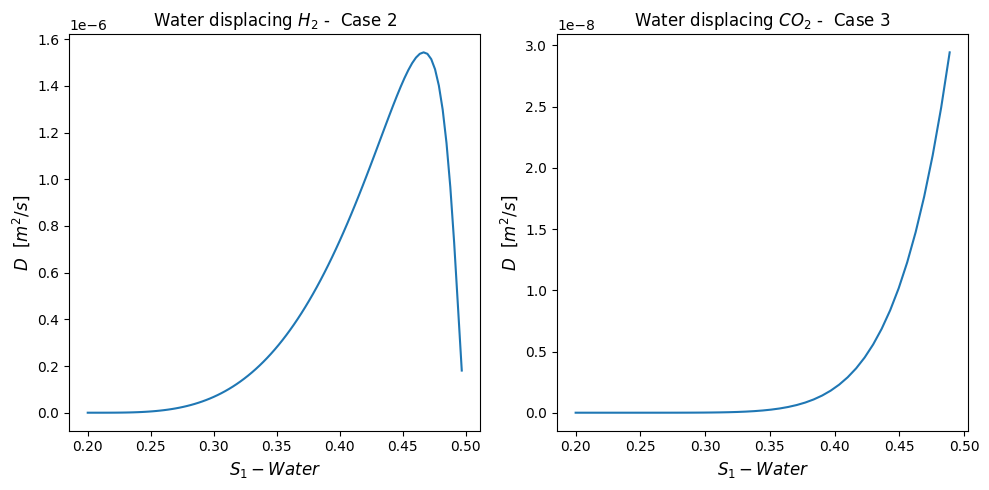

In [162]:
#plot saturation vs diffusion coefficient for Case 2

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#Case 2

ax[0].plot(diffusion['Case_2']['s'], diffusion['Case_2']['D'])
ax[0].set_xlabel(r'$S_{1} - Water$', fontsize=12)
ax[0].set_ylabel(r'$D$  $[m^{2}/s]$', fontsize=12)
ax[0].set_title(r'Water displacing $H_{2}$ -  Case 2')

#Case 3

ax[1].plot(diffusion['Case_3']['s'], diffusion['Case_3']['D'])
ax[1].set_xlabel(r'$S_{1} - Water$', fontsize=12)
ax[1].set_ylabel(r'$D$  $[m^{2}/s]$', fontsize=12)
ax[1].set_title(r'Water displacing $CO_{2}$ -  Case 3')

plt.tight_layout()
plt.show()

### Find F_1

In [311]:
from scipy import integrate

def function_F1(s, b, diff, fractional_imb):

    _F1 = (b - s) * diff / fractional_imb

    return _F1

def fractional_flow(dict_diffusion, df_fractional_imbibition):

    """
    Function to calculate the integral of the diffusion coefficient for each case

    Args:
    dict_diffusion: dictionary
        A dictionary containing the diffusion coefficient for each case

    case: str
        The name of the case

    Returns:
    integral: float
        The integral of the diffusion coefficient for the specified case
    """
    df_fractional_imbibition = pd.read_csv(df_fractional_imbibition)

    #Case 2

    s1i_case2 = df_fractional_imbibition.iloc[1, :]['S1i'] 
    s1_star_case2 = df_fractional_imbibition.iloc[1, :]['S*1']
    #porosity_case2 = df_fractional_imbibition.iloc[1, :]['phi']

    s1_diff_case2 = dict_diffusion['Case_2']['s']

    #choose betha as the value of saturation closest to 0.5


    #betha = s1_diff_case2[len(s1_diff_case2)//2]

    f1 = np.zeros(len(s1_diff_case2))
    coefficient = np.zeros(len(s1_diff_case2))

    # difference = 0.0000001
    for i in s1_diff_case2:

        betha = 0.5

        #diffusion coefficient at the saturation i
        #make sure is a numpy array

        diff = dict_diffusion['Case_2']['D'][s1_diff_case2 == i]

        for j in range(15):

            initial_F1 = (i - s1i_case2) / (s1_star_case2 - s1i_case2)

            num = integrate.quad(function_F1, i, s1_star_case2, args=(betha, diff, initial_F1))


            den = integrate.quad(function_F1, s1i_case2, s1_star_case2, args=(betha, diff, initial_F1))

            initial_F1 = 1 - (num[0] / den[0])

        coefficient[s1_diff_case2 == i] = den[0]

        #append the value of F1 to the list
        f1[s1_diff_case2 == i] = initial_F1

            
    return f1, coefficient

In [312]:
F1_case2 = fractional_flow(diffusion, df_fractional_imbibition='/home/ejt123/2024/CodingFluidFlow/data_cases.csv')

/tmp/ipykernel_932/3857795353.py:5: RuntimeWarning: invalid value encountered in divide
  _F1 = (b - s) * diff / fractional_imb
/tmp/ipykernel_932/3857795353.py:57: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  num = integrate.quad(function_F1, i, s1_star_case2, args=(betha, diff, initial_F1))
/tmp/ipykernel_932/3857795353.py:60: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  den = integrate.quad(function_F1, s1i_case2, s1_star_case2, args=(betha, diff, initial_F1))


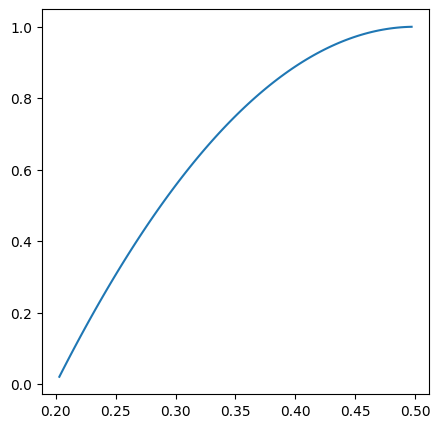

In [313]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(diffusion['Case_2']['s'], F1_case2[0])

In [314]:
len(F1_case2[0]), len(diffusion['Case_2']['s'])

(99, 99)

In [315]:
sat = diffusion['Case_2']['s'][-1]
sat

0.496969696969697

In [327]:
coeff = F1_case2[1][1:].sum()
coeff

2.999671187290622e-06

In [325]:
diffusion['Case_2']['D'][0]

0.0

In [326]:
np.sqrt(coeff*0.25/2)

0.000612338875469562

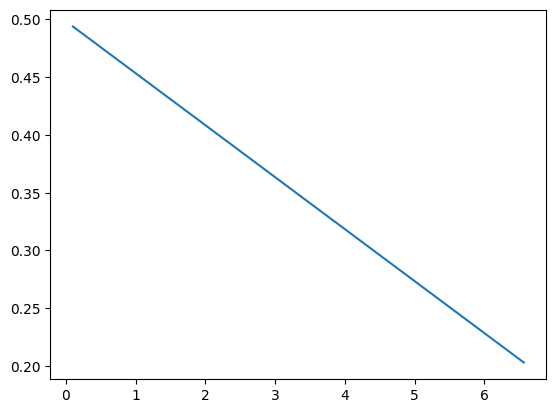

In [225]:
plt.plot(omega, saturation_case2)